<span>
<b>Authors:</b> 
<a href="http://------">Ornela Danushi </a>
<a href="http://------">Gerlando Gramaglia </a>
<a href="http://------">Domenico Profumo </a><br/>
<b>Python version:</b>  3.x<br/>
</span>

# Data Understanding & Preparation on Tennis Matches dataset 
Explore the dataset by studying the data quality, their distribution among several different features and the correlations.

The **central component** of the data science toolkit is **Pandas library** is a and it is used in conjunction with other libraries in that collection. Pandas is built on top of the **NumPy package**, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in pandas is often used to feed statistical analysis in **SciPy**, plotting functions from **Matplotlib**, and machine learning algorithms in Scikit-learn.


In [1]:
import pandas as pd
import math
import numpy as np
#import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
#from scipy.stats.stats import pearsonr

In [2]:
#df.dtypes #return the type of each attribute but is already included in the df.info() called later

# Types of Attributes and basic checks 
## Data Quality with reference to Syntactic Accuracy

Check the data integrity, that is whether there are any empty cells or corrupted data. 
We will use for this purpose the Pandas function **info()**, which checks if there is any 
null value in any column. This function also checks data type for each column, as well as 
number of each data types and number of observations (rows).

Moreover we check if each attribute is syntactically correct according to the specifications

In [3]:
df = df = pd.read_csv('matches_with_gender.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186128 entries, 0 to 186127
Data columns (total 51 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          186073 non-null  object 
 1   tourney_name        186103 non-null  object 
 2   surface             185940 non-null  object 
 3   draw_size           186099 non-null  float64
 4   tourney_level       186099 non-null  object 
 5   tourney_date        186100 non-null  float64
 6   match_num           186101 non-null  float64
 7   winner_id           186073 non-null  float64
 8   winner_entry        25827 non-null   object 
 9   winner_name         186101 non-null  object 
 10  winner_hand         186082 non-null  object 
 11  winner_ht           49341 non-null   float64
 12  winner_ioc          186099 non-null  object 
 13  winner_age          183275 non-null  float64
 14  loser_id            186100 non-null  float64
 15  loser_entry         44154 non-null

## Classification of Data Domain

### Tourney

   - *tourney_id* - ***object*** 
   - *tourney_name* - ***object*** 
   - *tourney_level* - ***object***
   - *tourney_spectators* - ***float64*** 
   - *tourney_revenue* - ***float64***
    
### Matches
 
   - *match_num*- ***float64***
   - *surface* - ***object***
   - *draw_size* - ***float64*** => ***int64*** 
   - *tourney_date* - ***float64*** => ***Datetime64***
   - *minutes* - ***float64*** 
   - *score* - ***object***
   - *round* - ***object*** 
   - *best_of* - ***float64***

### Players
 
   - *winner_id*- ***float64***          ||       *loser_id*- ***float64*** 
   - *winner_name* - ***object***        ||       *loser_name* - ***object***
   - *winner_ioc* - ***object***         ||       *loser_ioc* - ***object*** 
   - *winner_ht*- ***float64***          ||       *loser_ht*- ***float64*** 
   - *winner_age*- ***float64***         ||       *loser_age*- ***float64*** 
   - *winner_hand* - ***object***        ||       *loser_hand* - ***object***
   - *winner_entry* - ***object***       ||       *loser_entry* - ***object***
   - *winner_rank* - ***float64***       ||       *loser_rank* - ***float64***
   - *winner_rank_points* - ***float64***||       *loser_rank_points* - ***float64***
   - *w_ace* - ***float64***             ||       *l_ace* - ***float64***
   - *w_df* - ***float64***              ||       *l_df* - ***float64***
   - *w_svpt* - ***float64***            ||       *l_svpt* - ***float64*** 
   - *w_1stIn* - ***float64***           ||       *l_1stIn* - ***float64***
   - *w_1stWon* - ***float64***          ||       *l_1stWon* - ***float64***
   - *w_2ndWon* - ***float64***          ||       *l_2ndWon* - ***float64***
   - *w_SvGms* - ***float64***           ||       *l_SvGms* - ***float64***
   - *w_bpSaved* - ***float64***         ||       *l_bpSaved* - ***float64***
   - *w_bpFaced* - ***float64***         ||       *l_bpFaced* - ***float64*** 
   - *winner_gender* - ***object***      ||       *loser_gender* - ***object*** 
 

# Data Semantics

In this part we analyze each attributes type, conversion type, relationship, NaN and negative values check

## Tourney


### tourney_id

has to be unique and the first four characters are always the year while the remaining part is random

Analysis:

Split the value of the attribute in 2 parts, the first with 4 characters and the second with the remaing characters.
For both the parts build a set inserting each different year and id. 
Count how many wrong years are inserted through a NaN value. 
To detect the wrong ids is more difficult since they are random and don't follow a known a structure.
We can only conclude that the wrong id elements are those deriving from the wrong years.

NOTE: The decision to take is to delete or edit all these attributes.

In [4]:
print("description of tourney_id:" + "\n"+str(df['tourney_id'].describe()))

print("null_values: "+ str(df['tourney_id'].isnull().sum())) #55
tourney_year= df['tourney_id'].str[:4]
tourney_id= df['tourney_id'].str[5:]

print("Present years: "+ str(tourney_year.unique())) #['2019' '2018' '2017' '2016' '2020' '2021' nan]


description of tourney_id:
count       186073
unique        4853
top       2018-560
freq           478
Name: tourney_id, dtype: object
null_values: 55
Present years: ['2019' '2018' '2017' '2016' '2020' '2021' nan]


### tourney_name
is the name of the tourney

Analysis: non ci sono molti valori null, i nomi univoci risultano essere 2488, ciò mi fa pensare che in totale abbiamo 2488 torney diversi ma biosgna prima controllare la correttezza dei nomi. Per ogni torneo poso contare il numero di match diverse che si sono svolti e li salvo in tourney_match_dim

In [5]:
print("description of tourney_name:" + "\n"+str(df.tourney_name.describe()))
print("null_values: "+ str(df.tourney_name.isnull().sum())) #25

tourney_match_dim=df.groupby(df.tourney_name,as_index=False).size()
print(tourney_match_dim)

description of tourney_name:
count          186103
unique           2488
top       W15 Antalya
freq             4634
Name: tourney_name, dtype: object
null_values: 25
             tourney_name  size
0        's Hertogenbosch    97
1     ATP Next Gen Finals    16
2               Abu Dhabi    87
3                Acapulco   522
4                Adelaide   128
...                   ...   ...
2483          Zhuhai $50K    31
2484          Zhuhai $60K    62
2485            Zhuhai CH   220
2486      s Hertogenbosch   156
2487      s-Hertogenbosch    52

[2488 rows x 2 columns]


### tourney_level
they are split for men and women.

○ For men: 'G' = Grand Slams, 'M' = Masters 1000s, 'A' = other tour-level
events, 'C' = Challengers, 'S' = Satellites/ITFs, 'F' = Tour finals and other
season-ending events, and 'D' = Davis Cup. F

○ For women, there are several additional tourney_level codes, including 'P' =
Premier, 'PM' = Premier Mandatory, and 'I' = International. The various levels
of ITFs are given by the prize money (in thousands), such as '15' = ITF
$15,000. Other codes, such as 'T1' for Tier I (and so on) are used for older
WTA tournament designations. 'D' is used for the Federation/Fed/Billie Jean
King Cup, and also for the Wightman Cup and Bonne Bell Cup.

○ There is also some competition which can be for both men and women: 'E' =
exhibition (events not sanctioned by the tour, though the definitions can be
ambiguous), 'J' = juniors, and 'T' = team tennis, which does yet appear
anywhere in the dataset but will at some point.


Analisi: Abbiamo pochi valori null che possiamo rimpiazzare facendo un analisi sul tipo di torneo e il sesso dell'avversario. Possiamo inoltre utilizzare i range dei valori per scoprire info sul sesso del giocatore dato che i nomi univoci sono poco ed appartngono tutti a range specifici. Facciamo una scansione tramite for in cui identifico tutti i livelli delle donne dato che è l'unica categotia che contiene valori che altri non hanno

In [6]:
print("description of tourney_level:" + "\n"+str(df.tourney_level.describe()))
print("null_values: "+ str(df.tourney_level.isnull().sum())) #29
print("unique value:" + "\n"+str(df.tourney_level.unique())) 

#['A' 'P' 'G' 'I' 'M' 'PM' 'F' 'D' 'C' '15' '25' '60' '100' '80' '10' '50' '75' 'O' 'W' nan]

men_levels=['G','M','A','C','S','F','D','E','J','T']
women_levels=['G','M','A','C','S','F','D','E','J','T','P','PM','I','ITF','WTA','D']

gender=[] #['M','W','-']

test=df.tourney_level
iswomen=0
unknown=0

for i in test:
    if(i=='P' or i=='PM' or i=='I' or i=='ITF' or i=='WTA' or i=='D'):
        iswomen +=1
    else:
        unknown +=1

print("iswomen: " + str(iswomen))
print("unknown: " + str(unknown))



description of tourney_level:
count     186099
unique        19
top           15
freq       45807
Name: tourney_level, dtype: object
null_values: 29
unique value:
['A' 'P' 'G' 'I' 'M' 'PM' 'F' 'D' 'C' '15' '25' '60' '100' '80' '10' '50'
 '75' 'O' 'W' nan]
iswomen: 18247
unknown: 167881


### tourney_spectators     tourney_revenue

Numero di spettatori del torneo e guadagno totale. 

Analisi: Anche qui abbiamo dei valori null che potremmo escludere dato che sono pochi, inoltre un analisi potrebbe essere quella di valutare le entrate in base al tipo di torneo e proporzionare il numero di spettatori con il guadagno ottenuto per capire il costo in media di una partita (utile a scopo statistico).

In [7]:
print("\ndescription of:" + "\n"+str(df[['tourney_spectators', 'tourney_revenue']].describe()))
print("null_values:\t       "+ str(df.tourney_spectators.isnull().sum()) + "\t\t"
      + str(df.tourney_revenue.isnull().sum())) #27 | 26



description of:
       tourney_spectators  tourney_revenue
count       186101.000000     1.861020e+05
mean          4108.569153     8.226442e+05
std           2707.042984     6.008570e+05
min             91.000000     1.786574e+04
25%           2836.000000     5.473662e+05
50%           3340.000000     6.633297e+05
75%           4008.000000     8.340290e+05
max          18086.000000     5.002794e+06
null_values:	       27		26


## Matches

### match_num

a match-specific identifier. Often starting from 1, sometimes counting down from 300, and sometimes arbitrary.

Analysis: Anche qui abbiamo pochi valori null, il numero di match deve combaciare con il numero di valori del torneo

In [8]:
print("description of match_num:" + "\n"+str(df.match_num.describe()))
print("null_values: "+ str(df.match_num.isnull().sum())) #27

match_dim=df.groupby(['match_num']).size()
print(match_dim)

description of match_num:
count    186101.000000
mean        160.627992
std         289.326473
min           1.000000
25%          17.000000
50%         131.000000
75%         272.000000
max        8312.000000
Name: match_num, dtype: float64
null_values: 27
match_num
1.0       3530
2.0       3532
3.0       2726
4.0       2955
5.0       2802
          ... 
8308.0       1
8309.0       1
8310.0       1
8311.0       1
8312.0       1
Length: 929, dtype: int64


### surface
kind of surface for the match

Analysis: le superfici sono sempre di quattro tipi 'Hard' 'Clay' 'Grass' 'Carpet', ci sono 188 valori null

In [9]:
print("description of surface:" + "\n"+str(df.surface.describe()))
print("null_values: "+ str(df.surface.isnull().sum())) #188
print("unique value:" + "\n"+str(df.surface.unique()))  #['Hard' 'Clay' 'Grass' 'Carpet' nan]

description of surface:
count     185940
unique         4
top         Hard
freq       95243
Name: surface, dtype: object
null_values: 188
unique value:
['Hard' 'Clay' 'Grass' 'Carpet' nan]


### draw_size

number of players in the draw, often rounded up to the nearest power of 2. (For instance, a tournament with 28 players may be shown as 32.)

Analysis: since all powers of 2 are integers the idea is to convert to the 'int' format. Dopo averli convertiti in interi abbiamo utilizzato una funzione logaritmica per capire il giusto esponente che mi permettesse di ottenere i numeri con potenza di 2 più vicini ad esempio 15->16 23->32 ecc..

In [10]:
print("description of draw_size:" + "\n"+str(df.draw_size.describe()))
print("null_values: "+ str(df.draw_size.isnull().sum())) #29
print("unique value (before conversion):" + "\n"+str(df.draw_size.unique()))  


#[ 32. 128.  64.   8.   4.  29.  16.  30.  31.  20.  28.  23.  25.  27.
#  26.  19.  10.  15.  24.  18.  12.   2.  54.  48.  nan]


dw = df['draw_size']
log= np.log2(df['draw_size'])
for i in range(0, len(log)):
    dec, inter = math.modf(log[i])
    if dec == 0:
        log[i] = inter
    else:
        log[i] = inter + 1
dw = pow(2, log)

df.draw_size=dw
print("unique value (after conversion):" + "\n"+str(df.draw_size.unique()))  

# [ 32. 128.  64.   8.   4.  16.   2.  nan]

description of draw_size:
count    186099.000000
mean         41.037276
std          25.349017
min           2.000000
25%          32.000000
50%          32.000000
75%          32.000000
max         128.000000
Name: draw_size, dtype: float64
null_values: 29
unique value (before conversion):
[ 32. 128.  64.   8.   4.  29.  16.  30.  31.  20.  28.  23.  25.  27.
  26.  19.  10.  15.  24.  18.  12.   2.  54.  48.  nan]
unique value (after conversion):
[ 32. 128.  64.   8.   4.  16.   2.  nan]


### tourney_date

tourney_date: eight digits, YYYYMMDD, usually the Monday of the tournament week.

Analysis:
we convert type of tourney_date in Datetime64. Un analisi potrebbe essere quella di raggruppare ogni torneo con i match per le date associate ad esso in modo da riuscire a capire per ordine temporale le performace di ogni giocatore con il passare del tempo

In [11]:
df.tourney_date.describe()
print("null_values: "+ str(df.tourney_date.isnull().sum())) #28

df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')

df.tourney_date.head()

null_values: 28


0   2018-12-31
1   2018-12-31
2   2018-12-31
3   2018-12-31
4   2018-12-31
Name: tourney_date, dtype: datetime64[ns]

### minutes 

match length, where available

analisi: I minuti sono di tipo float, secondo noi è meglio lasciarli in questo formato senza convertirli ulteriolmente per facilitare i controllo statistico dei dati. Dalla descrizione possiamo notare la presenza di tantissmi valori null e la presenza di alcuni outliers da gestire.

In [12]:
print("description of draw_size:" + "\n"+str(df.minutes.describe()))
print("null_values: "+ str(df.minutes.isnull().sum())) #104468


description of draw_size:
count    81660.000000
mean        97.675753
std         41.492701
min          0.000000
25%         72.000000
50%         91.000000
75%        119.000000
max       4756.000000
Name: minutes, dtype: float64
null_values: 104468


### Score

Rappresenta il punteggio di ogni match?

Analysis: Abbiamo tanti valori unici quindi ci fa pensare a molti punteggi diversi tra le varie partite, abbiamo 199 partite di cui non conosciamo i relativi punteggi ottenuti. 

Il punteggio potrebbe essere messo in relazione con altri attributi come ad esempio i minuti o il best_of (che vedremo dopo)

In [13]:
print("description of score:" + "\n"+str(df.score.describe()))
print("null_values: "+ str(df.score.isnull().sum())) #199

description of score:
count      185929
unique       9705
top       6-3 6-4
freq         5377
Name: score, dtype: object
null_values: 199


### Round

Analysis: Cosa significano?

In [14]:
print("description of best_of:" + "\n"+str(df['round'].describe()))
print("null_values: "+ str(df['round'].isnull().sum())) #30
print("unique value:" + "\n"+str(df['round'].unique())) 
# ['F' 'SF' 'QF' 'R16' 'R32' 'Q1' 'Q2' 'Q3' 'R64' 'R128' 'RR' 'BR' nan]


description of best_of:
count     186098
unique        12
top          R32
freq       63069
Name: round, dtype: object
null_values: 30
unique value:
['F' 'SF' 'QF' 'R16' 'R32' 'Q1' 'Q2' 'Q3' 'R64' 'R128' 'RR' 'BR' nan]


### best_of

'3' or '5', indicating the number of set for this match

Analisi: i valori sembrano entrare nel range specificato perchè sono tutti 3,5 con la presenza di alcuni valori null (29). 

In [15]:
print("description of best_of:" + "\n"+str(df.best_of.describe()))
print("null_values: "+ str(df.best_of.isnull().sum())) #29
print("unique value:" + "\n"+str(df.best_of.unique())) # [ 3.  5. nan]


description of best_of:
count    186099.000000
mean          3.034100
std           0.258917
min           3.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           5.000000
Name: best_of, dtype: float64
null_values: 29
unique value:
[ 3.  5. nan]


## Players

### winner_id and loser_id

the player_id used in this repo for the winner of the match.

Analisi: Potremmo raggrupare id di ogni giocatore con il proprio nome in modo da avere nella lista dei giocatori l'associazione player-id. Tramite la groupby possiamo notare soltanto 13 valori diversi per nome-id (possibili wrong values)

In [16]:
print("\ndescription of:" + "\n"+str(df[['winner_id', 'loser_id']].describe()))
print("null_values: \t  "+ str(df.winner_id.isnull().sum()) + "\t\t "
      + str(df.loser_id.isnull().sum())) #55 | 28 

print(df.groupby(['winner_id']).winner_name.nunique().value_counts())

# df.groupby(['winner_id']).winner_name.nunique() 


description of:
           winner_id       loser_id
count  186073.000000  186100.000000
mean   180151.623529  181662.421397
std     46547.170898   46618.084325
min    100644.000000  100644.000000
25%    122425.000000  124116.000000
50%    203530.000000  205815.000000
75%    214152.000000  214818.000000
max    245099.000000  245099.000000
null_values: 	  55		 28
1    6163
2      13
Name: winner_name, dtype: int64


### winner_name and loser_name

name of player that win 

Analisi: abbiamo già esaminato questi valori quando abbiamo fatto la parte di dataintegration quindi al momento rimane solo da gestire il problema dei null

In [17]:
print("\ndescription of:" + "\n"+str(df[['winner_name', 'loser_name']].describe()))
print("null_values: \t    "+ str(df.winner_name.isnull().sum()) + "\t\t   "
      + str(df.loser_name.isnull().sum())) #27 | 31 



description of:
           winner_name     loser_name
count           186101         186097
unique            6180          10060
top     Novak Djokovic  Federico Gaio
freq               289            180
null_values: 	    27		   31


### Winner and loser ioc 

three-character country code

Analisi: ogni vincitore ha il proprio paese di riferimento, potremmo raggrupparli tutti per partecipanti e capire bene tutti i partecipanti del torneo di una determinata nazione. I Null sono pochi quindi volendo potrei fare una previsione controllando il nome del partecipante con gli scenari precedenti

In [18]:
print("\ndescription of:" + "\n"+str(df[['winner_ioc', 'loser_ioc']].describe()))
print("null_values:    "+ str(df.winner_ioc.isnull().sum()) + "\t   "
      + str(df.loser_ioc.isnull().sum())) #29 | 26 

nation=np.concatenate((df.winner_ioc.unique(), df.loser_ioc.unique()),0)
country = pd.DataFrame(nation)
country = country.drop_duplicates()

print("\ndifferent county names:" + "\n" + str(country.describe()))


description of:
       winner_ioc loser_ioc
count      186099    186102
unique        124       154
top           USA       USA
freq        16464     16728
null_values:    29	   26

different county names:
          0
count   154
unique  154
top     JPN
freq      1


### winner and loser ht

height in centimetres, where available

Analysis: abbiamo tanti valori null, in questo caso potremmo andare ad analizzare il nome del vincitore e vedere la nazionalità associata precedentemente per poi fare sostituire i valori null. Dato che l'altezza è un numero intero potremmo convertirlo in interi ma in questo momento lo lasciamo in float

In [19]:
print("\ndescription of:" + "\n"+str(df[['winner_ht', 'loser_ht']].describe()))
print("null_values:    "+ str(df.winner_ht.isnull().sum()) + "\t   "
      + str(df.loser_ht.isnull().sum())) #136787 | 147780 

#df['winner_ht']=df['winner_ht'].fillna(0).astype(np.int64)

#print("description of winner_ht:" + "\n"+str(df['winner_ht'].describe()))


description of:
          winner_ht     loser_ht
count  49341.000000  38348.00000
mean     181.407106    181.56308
std       11.630899     10.81565
min        2.000000      2.00000
25%      175.000000    175.00000
50%      183.000000    183.00000
75%      188.000000    188.00000
max      211.000000    211.00000
null_values:    136787	   147780


### winner and loser age

the age of the player, in years, depending on the date of the
tournament


Analisi: Bisogna capire cosa rappresenta la parte decimale, io opterei per trasformare tutto in valori interi ed utilizzare quei valori, inoltre l'età del vincitore può cambiare in base al torneo quindi potrei trovare un valore precedente per sostituire uno null.

In [20]:
print("\ndescription of:" + "\n"+str(df[['winner_age', 'loser_age']].describe()))
print("null_values:    "+ str(df.winner_age.isnull().sum()) + "\t   "
      + str(df.loser_age.isnull().sum())) #2853 | 6538 



description of:
          winner_age      loser_age
count  183275.000000  179590.000000
mean       23.963517      23.765932
std         4.462318       4.629857
min        14.042437      14.006845
25%        20.492813      20.131417
50%        23.457906      23.227926
75%        26.869268      26.767967
max        95.000000      74.485969
null_values:    2853	   6538


### winner_hand and loser_hand
R= right, L = left, U = unknown. For ambidextrous players, this is their
serving hand.

Analisi: anche qui abbiamo pochi null che possiamo rimpiazzare con i valori precedenti. Analizzando gli attributi possiamo scoprire che gli elementi all'interno sono unici e di tre tipi soltanto (non considerando i valori null)


In [21]:
print("\ndescription of:" + "\n"+str(df[['winner_hand', 'loser_hand']].describe()))
print("null_values:    "+ str(df.winner_hand.isnull().sum()) + "\t   "
      + str(df.loser_hand.isnull().sum())) #46 | 98 

#print("unique value:" + "\n"+str(df.winner_hand.unique()))  
#['R' 'L' 'U' nan]

#print("unique value:" + "\n"+str(df.loser_hand.unique()))  
#['R' 'L' 'U' nan]



description of:
       winner_hand loser_hand
count       186082     186030
unique           3          3
top              R          R
freq        120610     109264
null_values:    46	   98


### winner_entry and loser_entry

'WC' = wild card, 'Q' = qualifier, 'LL' = lucky loser, 'PR' = protected
ranking, 'ITF' = ITF entry, and there are a few others that are occasionally used.

loser_entry: analogous

Analysis: Abbiamo tanti valori null ma l'insieme di valori unici è di 19 valori

In [22]:
print("\ndescription of:" + "\n"+str(df[['winner_entry', 'loser_entry']].describe()))
print("null_values:  "+ str(df.winner_entry.isnull().sum()) + "\t  "
      + str(df.loser_entry.isnull().sum())) #160301 | 141974 


#print("unique value:" + "\n"+str(df.winner_entry.unique())) 

#[nan 'PR' 'Q' 'WC' 'Alt' 'LL' 'SE' 'ALT' 'SR' 'JE' 'A' 'ITF' 'P' 'I' 'IR' 'JR']

#print("unique value:" + "\n"+str(df.loser_entry.unique())) 

#[nan 'PR' 'Q' 'LL' 'WC' 'Alt' 'A' 'SE' 'ALT' 'SR' 'JE' '3' '4' '6' 'ITF' 'I' 'P' 'J' 'IR' 'JR']


entry=np.concatenate((df.winner_entry.unique(), df.loser_entry.unique()),0)
entry = pd.DataFrame(entry)
entry = entry.drop_duplicates()

print("\ndifferent entry:" + "\n" + str(entry.describe()))


description of:
       winner_entry loser_entry
count         25827       44154
unique           15          19
top               Q           Q
freq          13575       20346
null_values:  160301	  141974

different entry:
         0
count   19
unique  19
top     PR
freq     1


### winner_rank     loser_rank       

winner's ATP or WTA rank, as of the tourney_date, or the most recentranking date before the tourney_date

Analisi: Molti null, possiamo usare il rank del vincitore per esaminare come cambia durante i vari tornei. Potremmo usare un associazione anche qui con id-nome-nazionalità-rank-ecc.. magari nella parte di data preparation

In [23]:
print("\ndescription of:" + "\n"+str(df[['winner_rank', 'loser_rank']].describe()))
print("null_values:   "+ str(df.winner_rank.isnull().sum()) + "\t      "
      + str(df.loser_rank.isnull().sum())) #19409 | 35283 



description of:
         winner_rank     loser_rank
count  166719.000000  150845.000000
mean      383.810723     434.303736
std       313.996466     355.803171
min         1.000000       1.000000
25%       137.000000     157.000000
50%       298.000000     325.000000
75%       562.000000     642.000000
max      2220.000000    2257.000000
null_values:   19409	      35283


### winner_rank_points     loser_rank_points

number of ranking points, where available.

Analisi: anche qui abbiamo dei null value, possiamo mettere in correlazione il rank con rank_point per capire in ordine quali sono i migliori giocatori

Analisi: anche qui abbiamo dei null value, possiamo mettere in correlazione questi valori per capire le statistiche di ogni giocatore

In [24]:
print("\ndescription of:" + "\n"+str(df[['winner_rank_points', 'loser_rank_points']].describe()))
print("null_values:\t    "+ str(df.winner_rank_points.isnull().sum()) + "\t       "
      + str(df.loser_rank_points.isnull().sum())) #19427 | 35300 



description of:
       winner_rank_points  loser_rank_points
count       166701.000000      150828.000000
mean           470.450789         356.328692
std           1041.008107         702.626048
min              1.000000           1.000000
25%             49.000000          35.000000
50%            161.000000         138.000000
75%            438.000000         377.000000
max          16950.000000       16950.000000
null_values:	    19427	       35300


### w_ace l_ace

winner's number of aces

Analisi: anche qui abbiamo dei null value, possiamo mettere in correlazione questi valori per capire le statistiche di ogni giocatore

In [25]:
print("\ndescription of:" + "\n"+str(df[['w_ace', 'l_ace']].describe()))
print("null_values: "+ str(df.w_ace.isnull().sum()) + "\t   "
      + str(df.l_ace.isnull().sum())) #103818 | 103815 

#print("unique value:" + "\n"+str(df.w_ace.unique())) 

#[ 3. 10.  2. 12.  5. 11.  1. 16. 21. 17. 15.  6.  7. 18. 44.  9.  8.  4.
#  0. 14. 13. nan 33. 25. 20. 22. 26. 40. 19. 28. 29. 24. 30. 39. 23. 43.

#print("unique value:" + "\n"+str(df.l_ace.unique())) 

#[ 8. 17. 10.  1. 29. 12.  3.  5.  6. 13.  7.  4. 27. 22.  2.  0. 11. 20.
#  9. nan 14. 36. 26. 15. 16. 47. 24. 18. 25. 21. 59. 28. 19. 23. 67. 38.
# 37. 30. 34. 33. 31. 32. 40. 35. 52. 61. 53. 44. 45. 46. 56. 43. 39.]


description of:
              w_ace         l_ace
count  82310.000000  82313.000000
mean       4.813425      3.527875
std        4.387105      3.828217
min        0.000000      0.000000
25%        2.000000      1.000000
50%        4.000000      2.000000
75%        7.000000      5.000000
max       75.000000     67.000000
null_values: 103818	   103815


###  w_df      l_df

winner's number of doubles faults

Analisi: anche qui abbiamo dei null value, possiamo mettere in correlazione questi valori per capire le statistiche di ogni giocatore

In [26]:
print("\ndescription of:" + "\n"+str(df[['w_df', 'l_df']].describe()))
print("null_values: "+ str(df.w_df.isnull().sum()) + "\t   "
      + str(df.l_df.isnull().sum())) #103816 | 103809 



description of:
               w_df          l_df
count  82312.000000  82319.000000
mean       2.858174      3.612556
std        2.421105      2.608092
min        0.000000      0.000000
25%        1.000000      2.000000
50%        2.000000      3.000000
75%        4.000000      5.000000
max      114.000000    114.000000
null_values: 103816	   103809


### w_svpt   l_svpt

winner's number of serve points

Analisi: anche qui abbiamo dei null value, possiamo mettere in correlazione questi valori per capire le statistiche di ogni giocatore

In [27]:
print("\ndescription of:" + "\n"+str(df[['w_svpt', 'l_svpt']].describe()))
print("null_values: "+ str(df.w_svpt.isnull().sum()) + "\t   "
      + str(df.l_svpt.isnull().sum())) #103818 | 103813 



description of:
             w_svpt        l_svpt
count  82310.000000  82315.000000
mean      71.288069     73.557335
std       25.524468     24.985696
min        0.000000      0.000000
25%       53.000000     56.000000
50%       67.000000     69.000000
75%       87.000000     88.000000
max     1957.000000   1672.000000
null_values: 103818	   103813


### w_1st    ln l_1stln

winner’s number of first serves made

Analisi: anche qui abbiamo dei null value, possiamo mettere in correlazione questi valori per capire le statistiche di ogni giocatore

In [28]:
print("\ndescription of:" + "\n"+str(df[['w_1stIn', 'l_1stIn']].describe()))
print("null_values: "+ str(df.w_1stIn.isnull().sum()) + "\t   "
      + str(df.l_1stIn.isnull().sum())) #103818 | 103824 



description of:
            w_1stIn       l_1stIn
count  82310.000000  82304.000000
mean      44.270477     44.557737
std       16.951922     16.776201
min        0.000000      0.000000
25%       32.000000     33.000000
50%       42.000000     42.000000
75%       54.000000     54.000000
max     1330.000000    893.000000
null_values: 103818	   103824


### w_1stWon    l_1stWon

winner’s number of first-serve points won

Analisi: anche qui abbiamo dei null value, possiamo mettere in correlazione questi valori per capire le statistiche di ogni giocatore

In [29]:
print("\ndescription of:" + "\n"+str(df[['w_1stWon', 'l_1stWon']].describe()))
print("null_values: "+ str(df.w_1stWon.isnull().sum()) + "\t   "
      + str(df.l_1stWon.isnull().sum())) #103816 | 103817



description of:
           w_1stWon      l_1stWon
count  82312.000000  82311.000000
mean      32.130564     28.028903
std       11.409554     12.270939
min        0.000000      0.000000
25%       24.000000     19.000000
50%       30.000000     26.000000
75%       38.000000     35.000000
max      836.000000    532.000000
null_values: 103816	   103817


### w_2ndWon  l_2ndWon

winner’s number of second-serve points won

Analisi: anche qui abbiamo dei null value, possiamo mettere in correlazione questi valori per capire le statistiche di ogni giocatore

In [30]:
print("\ndescription of:" + "\n"+str(df[['w_2ndWon', 'l_2ndWon']].describe()))
print("null_values: "+ str(df.w_2ndWon.isnull().sum()) + "\t   "
      + str(df.l_2ndWon.isnull().sum())) #103819 | 103816 



description of:
           w_2ndWon      l_2ndWon
count  82309.000000  82312.000000
mean      14.451251     12.705681
std        5.933102      6.320212
min        0.000000      0.000000
25%       10.000000      8.000000
50%       14.000000     12.000000
75%       18.000000     16.000000
max      304.000000    399.000000
null_values: 103819	   103816


### w_SvGms    l_SvGms

winner’s number of serve games

Analisi: anche qui abbiamo dei null value, possiamo mettere in correlazione questi valori per capire le statistiche di ogni giocatore

In [31]:
print("\ndescription of:" + "\n"+str(df[['w_SvGms', 'l_SvGms']].describe()))
print("null_values: "+ str(df.w_SvGms.isnull().sum()) + "\t   "
      + str(df.l_SvGms.isnull().sum())) #103817 | 103810 


description of:
            w_SvGms       l_SvGms
count  82311.000000  82318.000000
mean      11.114784     10.940353
std        3.512519      3.497649
min        0.000000      0.000000
25%        9.000000      9.000000
50%       10.000000     10.000000
75%       14.000000     13.000000
max       49.000000     50.000000
null_values: 103817	   103810


### w_bpSaved   l_bpSaved

winner's number of breakpoints saved

Analisi: anche qui abbiamo dei null value, possiamo mettere in correlazione questi valori per capire le statistiche di ogni giocatore

In [32]:
print("\ndescription of:" + "\n"+str(df[['w_bpSaved', 'l_bpSaved']].describe()))
print("null_values: "+ str(df.w_bpSaved.isnull().sum()) + "\t   "
      + str(df.l_bpSaved.isnull().sum())) #103813 | 103817 


description of:
          w_bpSaved     l_bpSaved
count  82315.000000  82311.000000
mean       3.540861      4.660641
std        3.109012      3.148227
min        0.000000      0.000000
25%        1.000000      2.000000
50%        3.000000      4.000000
75%        5.000000      6.000000
max      209.000000    120.000000
null_values: 103813	   103817


### w_bpFaced   l_bpFaced

winner's number of breakpoints faced

Analisi: anche qui abbiamo dei null value, possiamo mettere in correlazione questi valori per capire le statistiche di ogni giocatore

In [33]:
print("\ndescription of:" + "\n"+str(df[['w_bpFaced', 'l_bpFaced']].describe()))
print("null_values: "+ str(df.w_bpFaced.isnull().sum()) + "\t   "
      + str(df.l_bpFaced.isnull().sum())) #103816 | 103822 

#print("unique value:" + "\n"+str(df.w_bpFaced.unique())) 

#[  6.   1.   2.   5.   8.   7.   0.   3.   4.   9.  17.  12.  11.  10.
#  14.  15.  13.  nan  18.  16.  22.  21.  19.  25.  23.  20.  27.  24.
#26.  30.  28.  29.  33. 266.  70.  36. 180.  34.]

#print("unique value:" + "\n"+str(df.l_bpFaced.unique())) 

#[ 15.  13.   5.   6.   4.   9.  11.   3.   2.   7.   8.   1.  18.  10.
#  25.  19.  14.  17.  nan  12.   0.  16.  20.  21.  22.  23.  24.  29.
#  26.  27.  28.  30.  31.  35. 190. 170.  48.  60. 180.]



description of:
          w_bpFaced     l_bpFaced
count  82312.000000  82306.000000
mean       5.410244      8.872124
std        4.206825      3.969575
min        0.000000      0.000000
25%        2.000000      6.000000
50%        5.000000      8.000000
75%        8.000000     11.000000
max      266.000000    190.000000
null_values: 103816	   103822


### winner_gender  loser_gender

gender of winner and loser

Analisi: Avevamo già analizzato questi dati precedentemente con la parte di data integration.

In [34]:
print("\ndescription of:" + "\n"+str(df[['winner_gender', 'loser_gender']].describe()))
print("null_values: \t"+ str(df.winner_gender.isnull().sum()) + "\t     "
      + str(df.loser_gender.isnull().sum())) #2704 | 2129

print("unique value:" + "\n"+str(df.winner_gender.unique())) #['M' nan 'F' 'U']
print("unique value:" + "\n"+str(df.loser_gender.unique())) #['M' nan 'F' 'U']


description of:
       winner_gender loser_gender
count         183424       183999
unique             3            3
top                F            F
freq          125314       125287
null_values: 	2704	     2129
unique value:
['M' nan 'F' 'U']
unique value:
['M' nan 'F' 'U']


## Data Statistics and Data Distributions

The pandas function describe() is used to obtain basic statistical notions. By specifying the include attribute as 'all' we get statistics both for the numerical and categorical attributes of the dataset.
The pandas function memory_usage() returns a Pandas Series having the memory usage of each column (in bytes) in a Pandas DataFrame. By specifying the deep attribute as True, we can get to know the actual space being taken by each column.
The pandas function unique() is used to obtain the values of composition. By which we can view NaN, empty values .. from the acceptable ones, where this can help to understand something more.
Another observation that we can do, but that is general with viewing the statistics of numerical data is the fact that we have the min and/or max value which are very different from the mean value, and for this we assume to have outliers, for sure.

We see that count(winner_name) < count(loser_name) of unique values then this means that the set of winners is smaller than the set of losers. Same consideration is valid also for winner_ioc/loser_ioc attributes.

In [35]:
pd.options.display.float_format = '{:.2f}'.format # to visualize data through a table

df.describe(datetime_is_numeric=True,include='all') # a summary of statistical informations

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_entry,winner_name,...,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_spectators,tourney_revenue,winner_gender,loser_gender
count,186073,186103,185940,186099.00,186099,186100,186101.00,186073.00,25827,186101,...,82311.00,82306.00,166719.00,166701.00,150845.00,150828.00,186101.00,186102.00,183424,183999
unique,4853,2488,4,NaN,19,NaN,NaN,NaN,15,6180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
top,2018-560,W15 Antalya,Hard,NaN,15,NaN,NaN,NaN,Q,Novak Djokovic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F
freq,478,4634,95243,NaN,45807,NaN,NaN,NaN,13575,289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125314,125287
mean,NaN,NaN,NaN,41.13,NaN,2018-09-09 10:23:36.631918336,160.63,180151.62,NaN,NaN,...,4.66,8.87,383.81,470.45,434.30,356.33,4108.57,822644.20,NaN,NaN
min,NaN,NaN,NaN,2.00,NaN,2016-01-04 00:00:00,1.00,100644.00,NaN,NaN,...,0.00,0.00,1.00,1.00,1.00,1.00,91.00,17865.74,NaN,NaN
25%,NaN,NaN,NaN,32.00,NaN,2017-05-15 00:00:00,17.00,122425.00,NaN,NaN,...,2.00,6.00,137.00,49.00,157.00,35.00,2836.00,547366.24,NaN,NaN
50%,NaN,NaN,NaN,32.00,NaN,2018-08-27 00:00:00,131.00,203530.00,NaN,NaN,...,4.00,8.00,298.00,161.00,325.00,138.00,3340.00,663329.71,NaN,NaN
75%,NaN,NaN,NaN,32.00,NaN,2019-10-07 00:00:00,272.00,214152.00,NaN,NaN,...,6.00,11.00,562.00,438.00,642.00,377.00,4008.00,834029.00,NaN,NaN
max,NaN,NaN,NaN,128.00,NaN,2021-08-23 00:00:00,8312.00,245099.00,NaN,NaN,...,120.00,190.00,2220.00,16950.00,2257.00,16950.00,18086.00,5002793.97,NaN,NaN


In [36]:
df.memory_usage(deep=True)

Index                  5716136
tourney_id            13773860
tourney_name          12902923
surface               11361062
draw_size              1489024
tourney_level         10899509
tourney_date           1489024
match_num              1489024
winner_id              1489024
winner_entry           6640780
winner_name           13375073
winner_hand           10794228
winner_ht              1489024
winner_ioc            11166868
winner_age             1489024
loser_id               1489024
loser_entry            7129461
loser_name            13371024
loser_hand            10792876
loser_ht               1489024
loser_ioc             11166952
loser_age              1489024
score                 12301540
best_of                1489024
round                 11086531
minutes                1489024
w_ace                  1489024
w_df                   1489024
w_svpt                 1489024
w_1stIn                1489024
w_1stWon               1489024
w_2ndWon               1489024
w_SvGms 

### Tourney

Analysis: tourney_level is an attribute that depends on the gender of the player, so we have to underline their relations. By the graph we conclude that there are some errors due to the 'U' gender that have to be fixed and are treated better in the 'handling of missing values' part. The good thing is that, as we can see, the majority of the matches have been played only between the same gender and so a consideration to be done is that of considering the 'U' value the same of the other member of the couple in which it appears; if the other value is 'M' and there is a 'U' then that 'U' has to be transformed in 'M', and vice versa. Considering also the fact that the tourney_level can be applied to that gender, otherwise also the known value has to be exchanged. Also by the graph we can see the distribution of levels according the gender of the players, and so i.e. the 'C' between the man.

<AxesSubplot:title={'center':'Distribution of tourney_level values according to the gender of the player'}, xlabel='Gender of the winner and loser player', ylabel='Counting'>

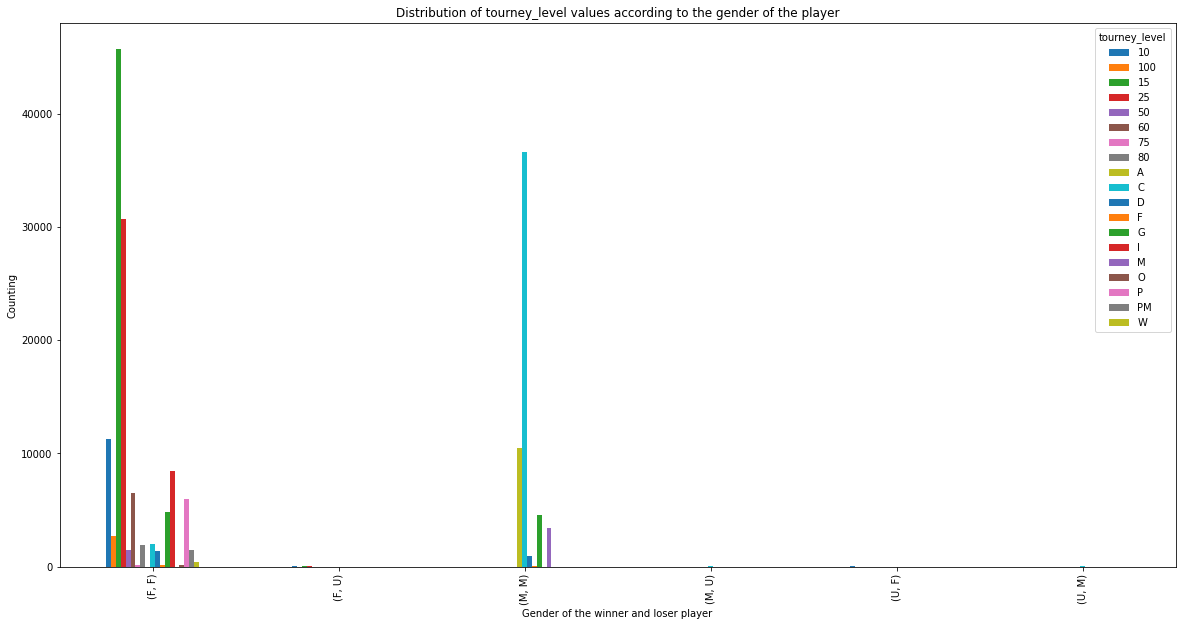

In [37]:
lf = df.groupby(['winner_gender', 'loser_gender', 'tourney_level']).size()
lf = lf.unstack()
lf.plot(
    figsize=(20, 10), 
    title="Distribution of tourney_level values according to the gender of the player", 
    xlabel="Gender of the winner and loser player",
    ylabel="Counting",
    kind='bar')

We see the distribution of tourney_spectators and tourney_revenue and notice that they have a quite similar behavior. we could treat usefully these data by supposing for instance, an approximation of the cost of a ticket through the division of the avg revenue with the avg number of spectators

In [38]:
df[['tourney_spectators', 'tourney_revenue']].describe()

,tourney_spectators,tourney_revenue
count,186101.00,186102.00
mean,4108.57,822644.20
std,2707.04,600857.05
min,91.00,17865.74
25%,2836.00,547366.24
50%,3340.00,663329.71
75%,4008.00,834029.00
max,18086.00,5002793.97


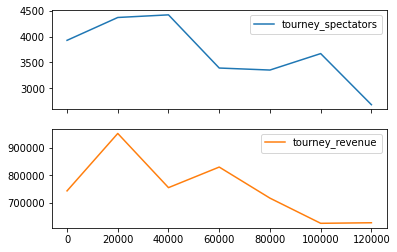

In [39]:
dl = pd.DataFrame({ 'tourney_spectators': df['tourney_spectators'], 'tourney_revenue': df['tourney_revenue']}, index=[0, 20000, 40000, 60000, 80000, 100000, 120000])
lines = dl.plot.line(subplots=True)

In [40]:
df.tourney_revenue.mean() / df.tourney_spectators.mean()

200.22644566259393

## Matches

We see more deeply on surface since has few different values. To understand which type of surfaces has been used in the matches we put it in relations the years of the tourney_date values. Thanks to the visualization of their distribution we can conclude that they follow the same increasing way instead for the last year, denoted by 2021, there is an inversion of the 'Clay' with the 'Hard' surface type.


<AxesSubplot:title={'center':'Distribution of the surface values according to the years of the tourney_date values'}>

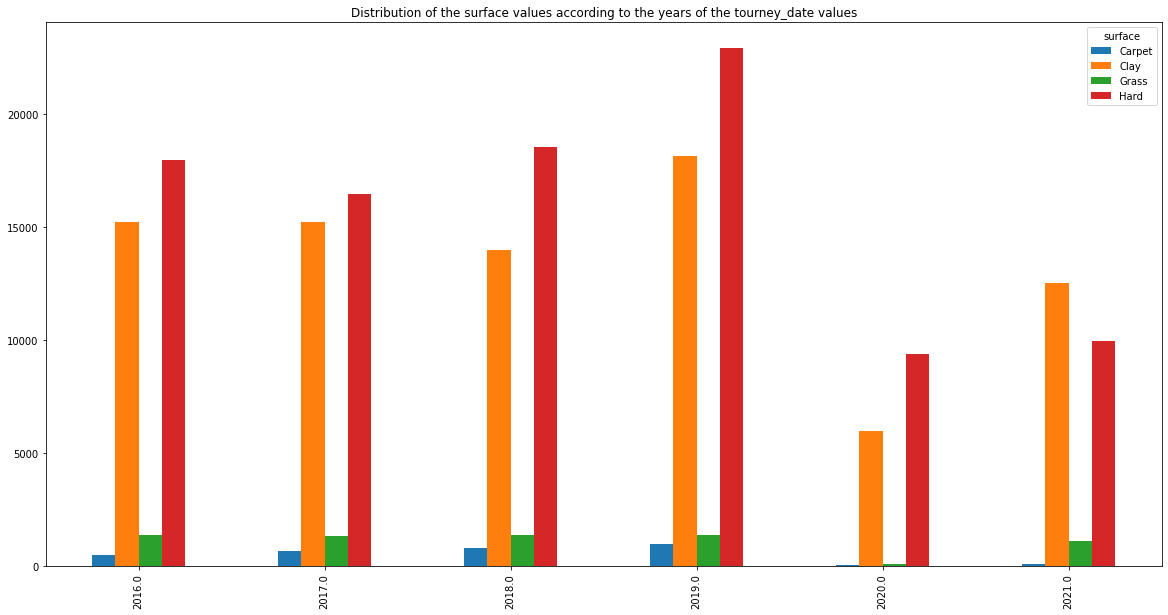

In [41]:

lf = df.groupby([ [x.year for x in df.tourney_date], 'surface']).size()
lf = lf.unstack()
lf.plot(
    figsize=(20, 10), 
    title="Distribution of the surface values according to the years of the tourney_date values", 
    kind='bar')

According to the distribution of the matches through the months and the years we can note that they follow the same structure for the first 4 years, while for the last 2 they have more missing values. In those years we can say that July was the month with more matches played.

<AxesSubplot:title={'center':'Distribution of the matches according the months of the years'}>

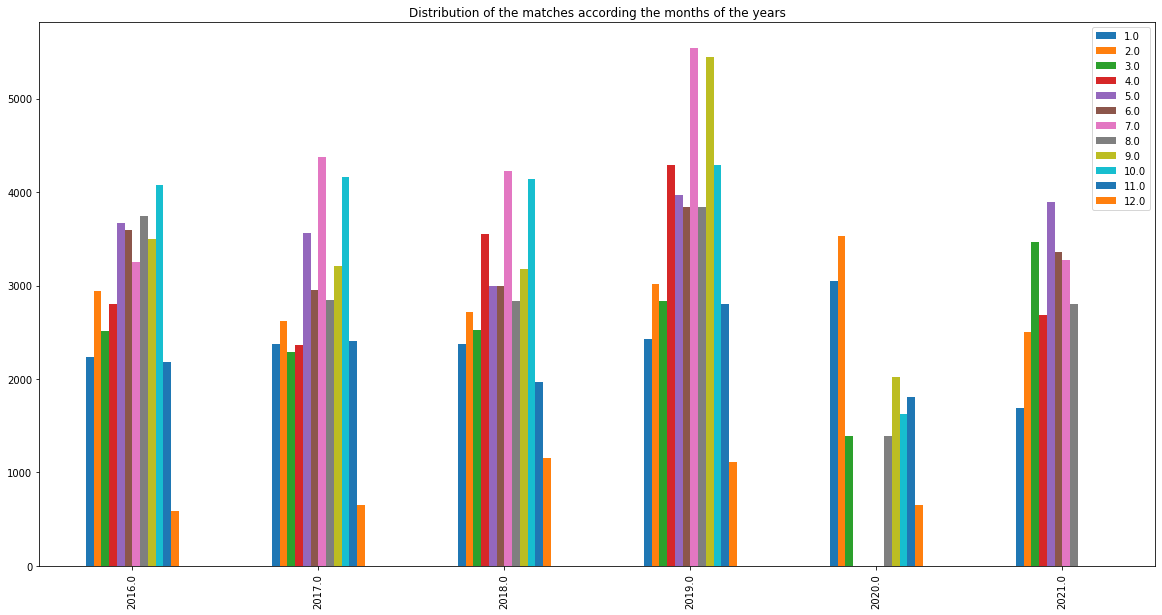

In [42]:
lf = df.groupby([ [x.year for x in df.tourney_date], [x.month for x in df.tourney_date]]).size()
lf = lf.unstack()
lf.plot(
    figsize=(20, 10), 
    title="Distribution of the matches according the months of the years", 
    kind='bar')

According to the distribution of the matches duration along the years, we note that there are a lot of matches played with less than 1 hour, 1 hour and some of 2 hours. THe bad thing is that there are also a lot of NaN values, this means that that data was not available for those matches and have to be treated in some way in the 'handling the missing values' part.

<AxesSubplot:title={'center':'Distribution of the duration of the matches during the years'}>

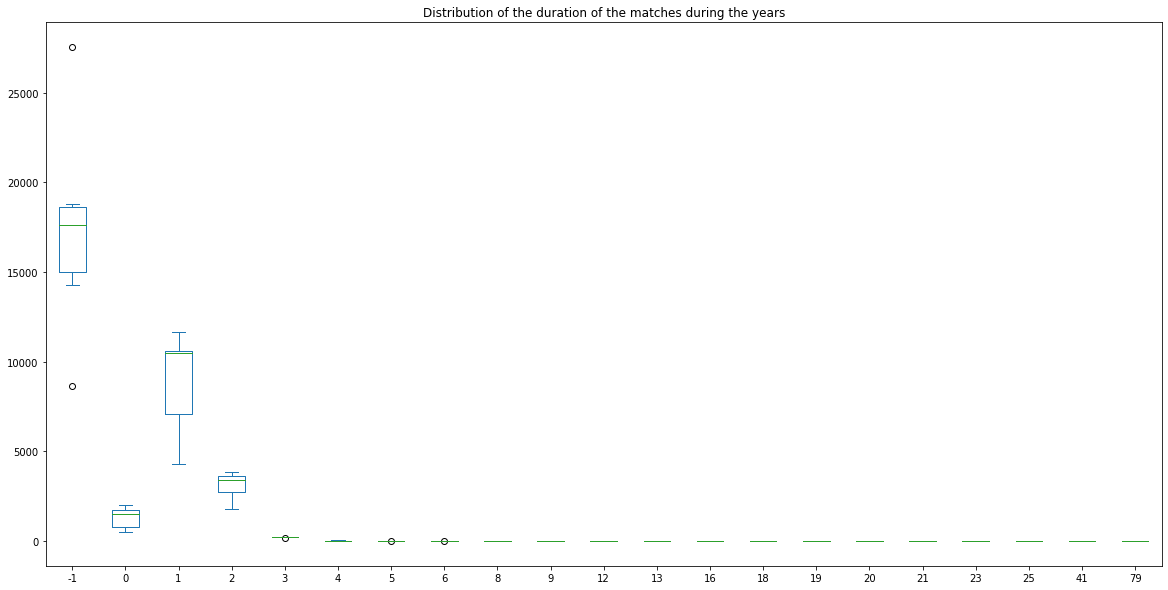

In [43]:
minutes = df['minutes']
minutes = pd.to_numeric(minutes, errors='coerce') #for removing all non-numeric values use to_numeric with parameter errors='coerce' - to replace non-numeric values to NaNs
minutes = minutes.fillna(-1)
minutes = minutes.astype(int) #Last convert values to ints:

lf = df.groupby([ [x.year for x in df.tourney_date], [ int( x // 60) for x in minutes]]).size()
lf = lf.unstack()
lf.plot(
    figsize=(20, 10), 
    title="Distribution of the duration of the matches during the years", 
    kind='box')

We note that the majority of the best_of attribute is the same for all the years, and so we could souppose for the missing values that will take the most used value too, which is the 3.

<AxesSubplot:title={'center':'Distribution of best_of matches during the years'}>

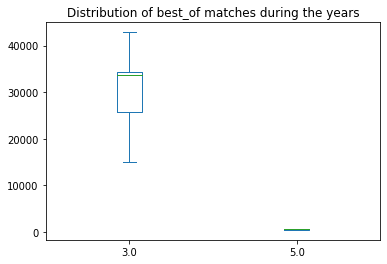

In [44]:
lf = df.groupby([ [x.year for x in df.tourney_date], 'best_of']).size()
lf = lf.unstack()
lf.plot(
    title="Distribution of best_of matches during the years", 
    kind='box')

We see that there are some previous consideration then this means that there are same countries that are never qualified between the winners Moreover, by seeing their distribution graph we note they are similar.

<AxesSubplot:title={'center':'Distribution of winner_ioc'}, xlabel='winner_ioc'>

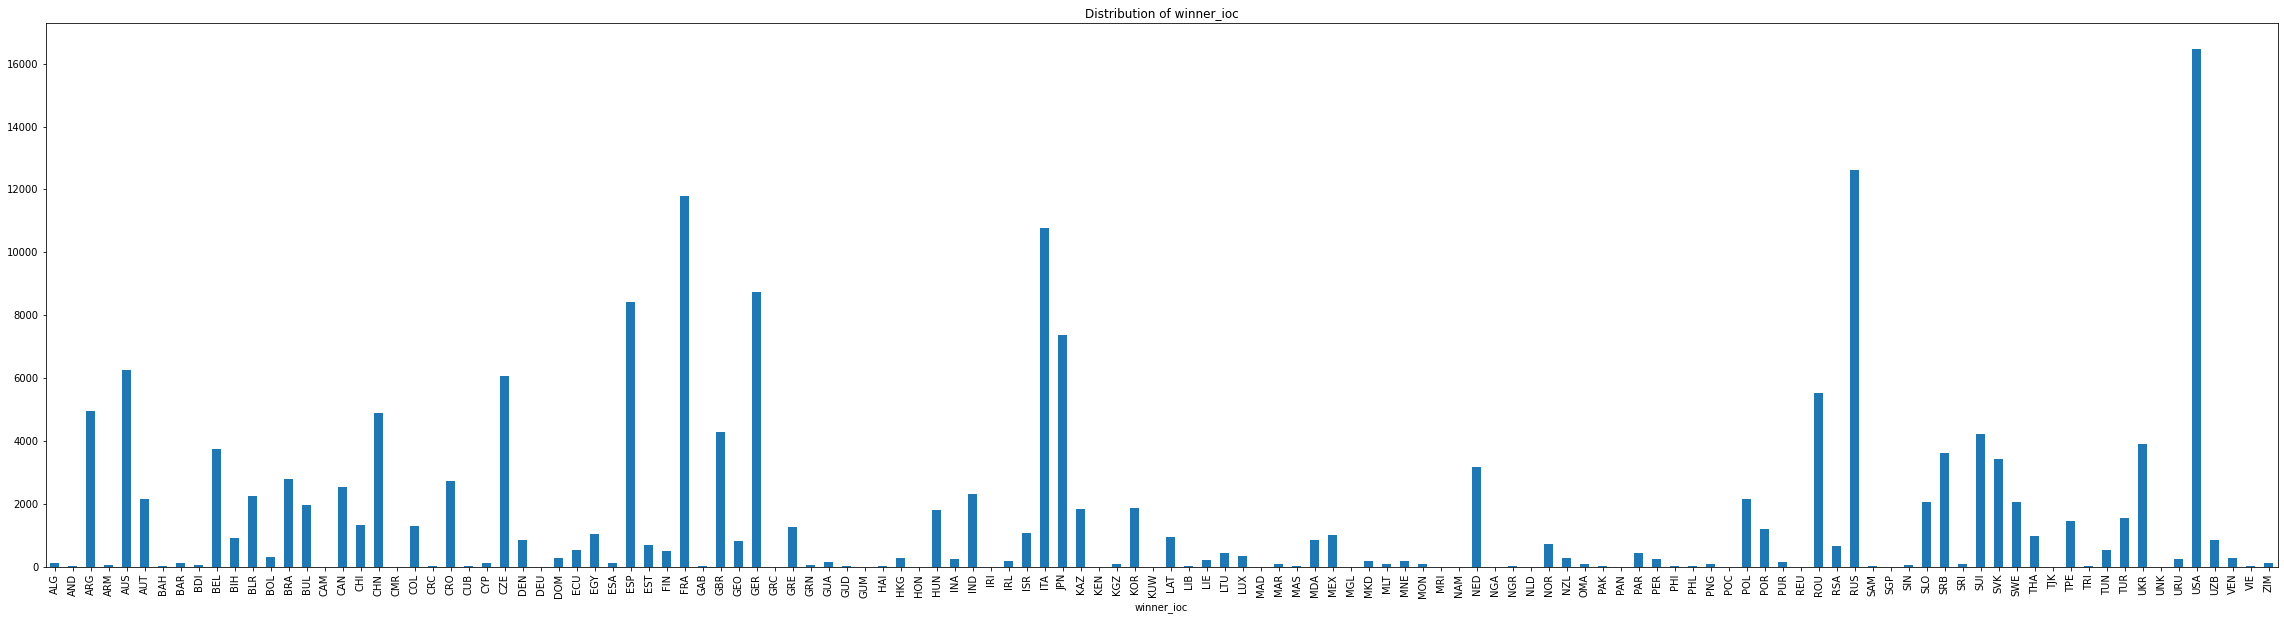

In [45]:
lf = df.groupby([ df.winner_ioc]).size()
lf.plot(
    figsize=(40, 10), 
    title="Distribution of winner_ioc", 
    kind='bar')

<AxesSubplot:title={'center':'Distribution of loser_ioc'}, xlabel='loser_ioc'>

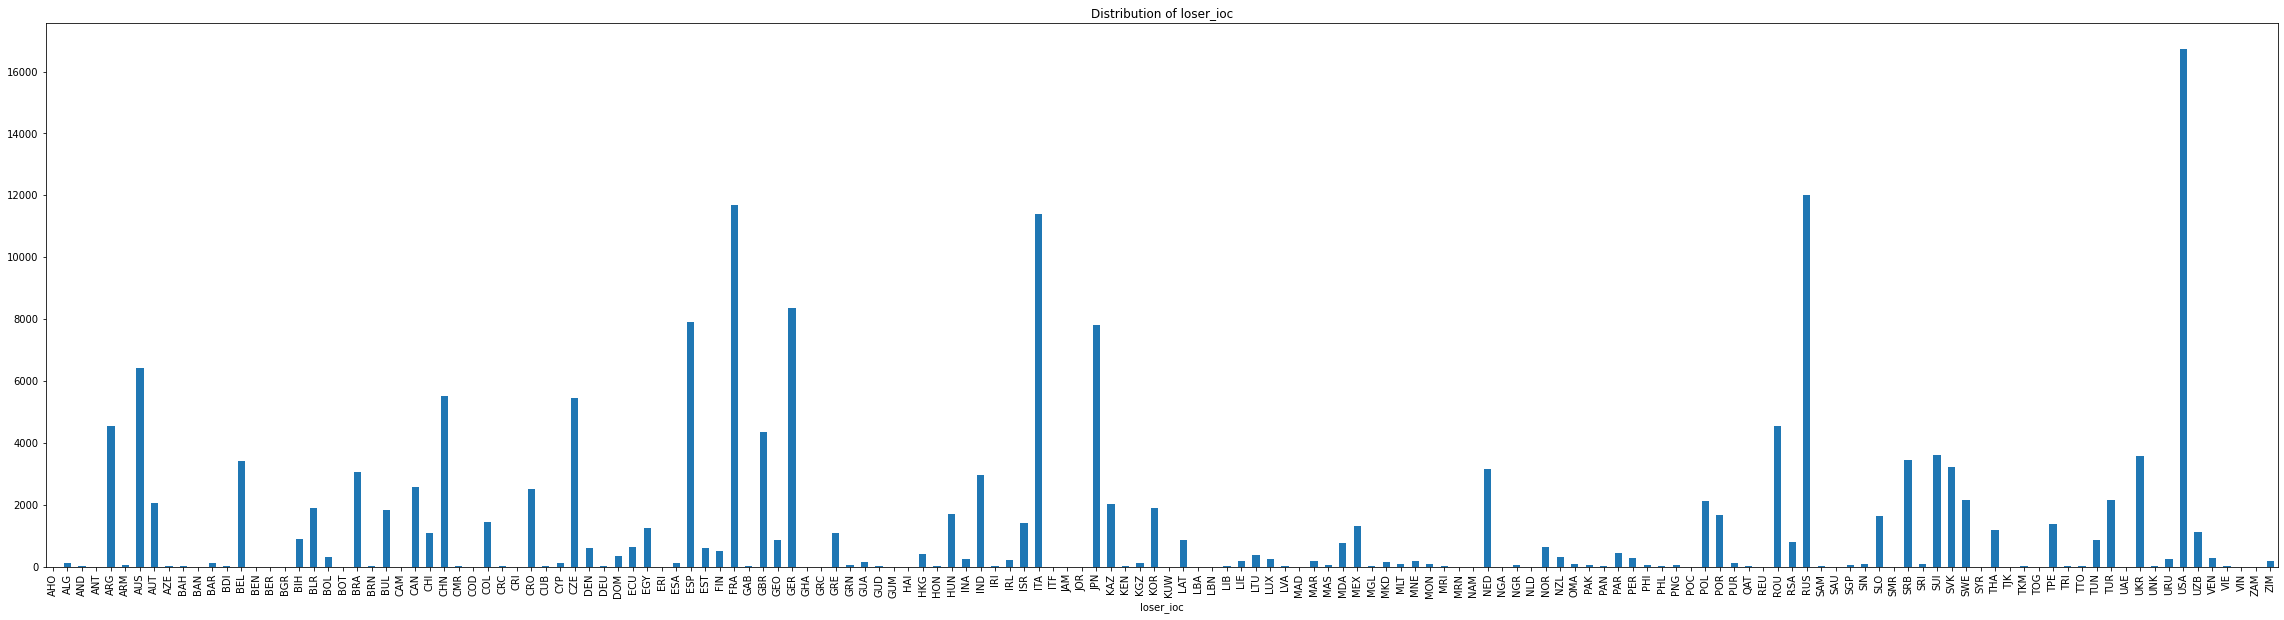

In [46]:
lf = df.groupby([ df.loser_ioc]).size()
lf.plot(
    figsize=(40, 10), 
    title="Distribution of loser_ioc", 
    kind='bar')

We expected that the following attributes behave in the same way, they have 3 different values. Moreover, by their distribution graph we note that the majority of the players user the R hand, both the men and women players.

<AxesSubplot:title={'center':'Distribution of the hand used on matches and their gender'}, xlabel='winner_hand,loser_hand,winner_gender'>

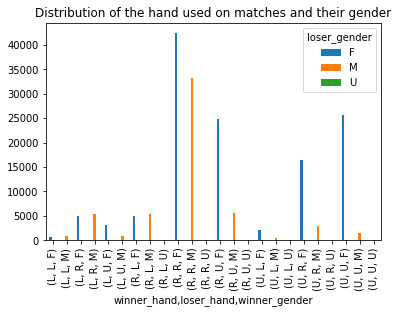

In [47]:
lf = df.groupby([ 'winner_hand', 'loser_hand', 'winner_gender', 'loser_gender']).size()
lf = lf.unstack()
lf.plot(
    title="Distribution of the hand used on matches and their gender", 
    kind='bar')

By visualizing the distribution of winner_entry/loser_entry we note that some are present only with the losers and vice versa, some are present only with the winners. 
NOTA ?: There is some relation with the ranking of the player to discover

<AxesSubplot:title={'center':'Distribution of winner_entry'}, xlabel='winner_entry'>

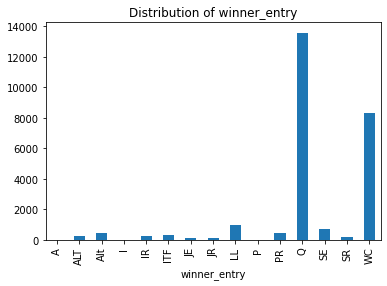

In [48]:
lf = df.groupby([ 'winner_entry']).size()
lf.plot(
    title="Distribution of winner_entry",
    kind='bar')

<AxesSubplot:title={'center':'Distribution of loser_entry'}, xlabel='loser_entry'>

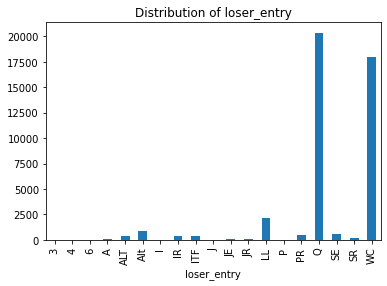

In [49]:
rf = df.groupby([ 'loser_entry']).size()
rf.plot(
    title="Distribution of loser_entry",
    kind='bar')

### Players

We represent different attributes by grouping them according to the relation of similarity of their meaning. So for instance, some that are specific of a player and some other that are specific of how a match was valued. They have to be treated again later with considerations specific of the preparation data phase.

In [50]:
df[['winner_id', 'loser_id', 'winner_ht', 'loser_ht', 'winner_age', 'loser_age', 'winner_rank', 'loser_rank', 'winner_rank_points', 'loser_rank_points']].describe()

,winner_id,loser_id,winner_ht,loser_ht,winner_age,loser_age,winner_rank,loser_rank,winner_rank_points,loser_rank_points
count,186073.00,186100.00,49341.00,38348.00,183275.00,179590.00,166719.00,150845.00,166701.00,150828.00
mean,180151.62,181662.42,181.41,181.56,23.96,23.77,383.81,434.30,470.45,356.33
std,46547.17,46618.08,11.63,10.82,4.46,4.63,314.00,355.80,1041.01,702.63
min,100644.00,100644.00,2.00,2.00,14.04,14.01,1.00,1.00,1.00,1.00
25%,122425.00,124116.00,175.00,175.00,20.49,20.13,137.00,157.00,49.00,35.00
50%,203530.00,205815.00,183.00,183.00,23.46,23.23,298.00,325.00,161.00,138.00
75%,214152.00,214818.00,188.00,188.00,26.87,26.77,562.00,642.00,438.00,377.00
max,245099.00,245099.00,211.00,211.00,95.00,74.49,2220.00,2257.00,16950.00,16950.00


In [51]:
df[['w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon', 'w_2ndWon', 'l_2ndWon', 'w_SvGms', 'l_SvGms', 'w_bpSaved', 'l_bpSaved', 'w_bpFaced', 'l_bpFaced', 'w_ace', 'l_ace', 'w_df', 'l_df']].describe()

,w_svpt,l_svpt,w_1stIn,l_1stIn,w_1stWon,l_1stWon,w_2ndWon,l_2ndWon,w_SvGms,l_SvGms,w_bpSaved,l_bpSaved,w_bpFaced,l_bpFaced,w_ace,l_ace,w_df,l_df
count,82310.00,82315.00,82310.00,82304.00,82312.00,82311.00,82309.00,82312.00,82311.00,82318.00,82315.00,82311.00,82312.00,82306.00,82310.00,82313.00,82312.00,82319.00
mean,71.29,73.56,44.27,44.56,32.13,28.03,14.45,12.71,11.11,10.94,3.54,4.66,5.41,8.87,4.81,3.53,2.86,3.61
std,25.52,24.99,16.95,16.78,11.41,12.27,5.93,6.32,3.51,3.50,3.11,3.15,4.21,3.97,4.39,3.83,2.42,2.61
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,53.00,56.00,32.00,33.00,24.00,19.00,10.00,8.00,9.00,9.00,1.00,2.00,2.00,6.00,2.00,1.00,1.00,2.00
50%,67.00,69.00,42.00,42.00,30.00,26.00,14.00,12.00,10.00,10.00,3.00,4.00,5.00,8.00,4.00,2.00,2.00,3.00
75%,87.00,88.00,54.00,54.00,38.00,35.00,18.00,16.00,14.00,13.00,5.00,6.00,8.00,11.00,7.00,5.00,4.00,5.00
max,1957.00,1672.00,1330.00,893.00,836.00,532.00,304.00,399.00,49.00,50.00,209.00,120.00,266.00,190.00,75.00,67.00,114.00,114.00
